In [ ]:
# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

%matplotlib inline

In [10]:
# Loading the Amazon UK product dataset
archivo = "/Users/natalialabrador/Desktop/Ironhack/Labs/20. lab-eda-bivariate/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(archivo)


In [11]:
# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [12]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [13]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [14]:
# Part 1 Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.
# 1. Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [17]:
# Are there categories where being a best-seller is more prevalent?

# Calculate the proportion of best_sellers for each category 
prop_best_seller = crosstab_result[True] / crosstab_result.sum(axis=1)

# Order the categories in descendent order based on the best-seller proportion 
prop_best_seller_sorted = prop_best_seller.sort_values(ascending=False)

prop_best_seller_sorted


category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

Are there categories where being a best-seller is more prevalent?

No, there are not categories where being a best-seller is more prevalent. There is not a huge difference between the proportions of one category or another. The top 3 categories where the product is a best seller have similar proportions (all arounf 0.05).

In [19]:
# 2. Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

Determine if the best-seller distribution is independent of the product category.

Because the Chi-square value is 0.0 (below than 0.5), there is a significant association between the product category and the best-seller status.



In [21]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
association(crosstab_result, method="cramer")

0.1222829439760564

Determine the strength of association between best-seller status and category.

There is a weak association between category and isBestSeller variables because the value is close to 0.

<Axes: xlabel='category'>

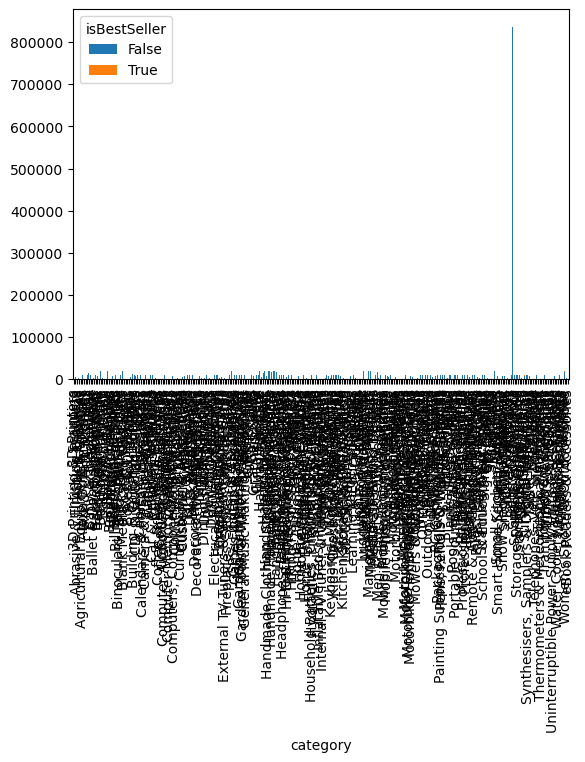

In [22]:
# 3. Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

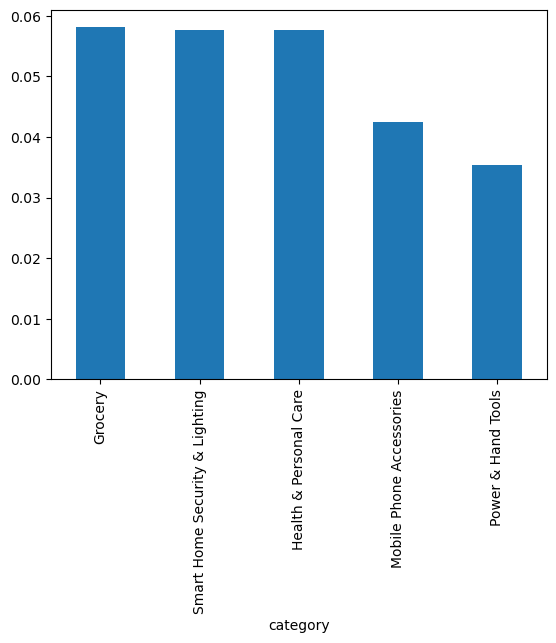

In [24]:
prop_best_seller_sorted.head(5).plot(kind="bar", stacked=True)


In [23]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.
# 0. Preliminary Step: Remove outliers in product prices.
def tukeys_test_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers

# Identificar los outliers en tus datos
outliers = tukeys_test_outliers(df['price'])

# Eliminar los outliers del DataFrame original
df_cleaned = df[~df['price'].isin(outliers)]

<Axes: xlabel='price', ylabel='category'>

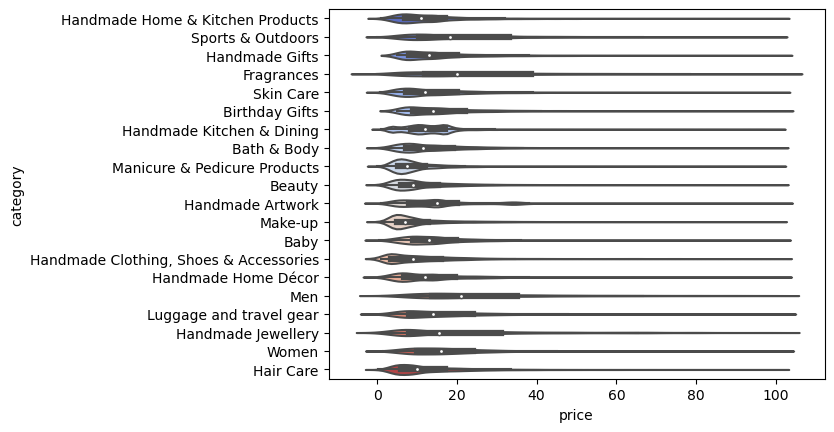

In [42]:
# Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
category_counts = df_cleaned['category'].value_counts()
top_categories_20 = category_counts.head(20)
df_filtered = df_cleaned[df_cleaned['category'].isin(top_categories_20.index)]
sns.violinplot(data=df_filtered, x='price', y='category', palette="coolwarm")

In [40]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Calculate the median price for each category
median_prices = df.groupby('category')['price'].median()

# Identify the category with the highest median price
category_highest_median_price = median_prices.idxmax()
highest_median_price = median_prices.max()
print("Product category with the highest median price:", category_highest_median_price)
print("Highest median price:", highest_median_price)

Product category with the highest median price: Laptops
Highest median price: 1042.725


<Axes: ylabel='category'>

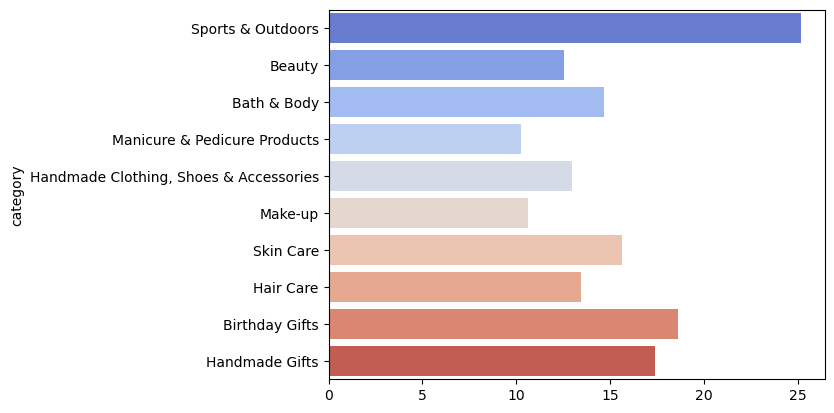

In [48]:
# 2. Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Calculate the average price for each product category
average_prices = df_cleaned.groupby('category')['price'].mean()

# Select the top 10 product categories based on count
top_categories_10 = df_cleaned['category'].value_counts().head(10).index

# Filter the average prices for the top 10 categories
top_average_prices = average_prices.loc[top_categories_10]

# Step 4: Create a bar chart
sns.barplot(x=top_average_prices.values, y=top_average_prices.index, palette="coolwarm")

In [41]:
# Which product category commands the highest average price? Don't filter here by top categories.
# Calculate the average price for each category
average_prices = df.groupby('category')['price'].mean()

# Identify the category with the highest average price
category_highest_avg_price = average_prices.idxmax()
highest_avg_price = average_prices.max()

print("Product category with the highest average price:", category_highest_avg_price)
print("Highest average price:", highest_avg_price)

Product category with the highest average price: Laptops
Highest average price: 1087.987826986755


<Axes: xlabel='stars', ylabel='category'>

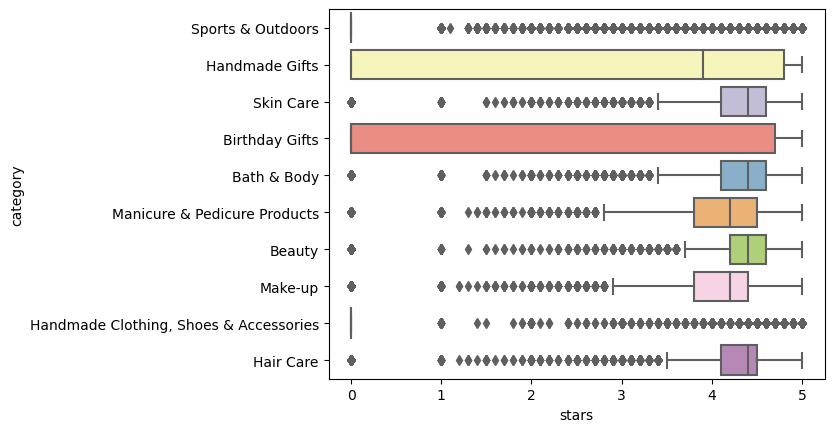

In [47]:
# 3. Box Plots:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Step 1: Filter the DataFrame to include only the top 10 categories based on count
top_categories_10 = df_cleaned['category'].value_counts().head(10).index
df_filtered_2 = df_cleaned[df_cleaned['category'].isin(top_categories_10)]

# Step 2: Create side-by-side box plots for the ratings of products in each of these categories
sns.boxplot(data=df_filtered_2, x='stars', y='category', palette="Set3")

In [45]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# Calculate the median rating for each category
median_ratings = df.groupby('category')['stars'].median()

# Identify the category with the highest median rating
category_highest_median_rating = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print("Category with the highest median rating:", category_highest_median_rating)
print("Highest median rating:", highest_median_rating)

Category with the highest median rating: Computer Memory
Highest median rating: 4.7


In [49]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.
# 1. Correlation Coefficients:
# Calculate the correlation coefficient between price and stars
correlation_coefficient = df['price'].corr(df['stars'])

print("Correlation coefficient between price and stars:", correlation_coefficient)



Correlation coefficient between price and stars: -0.12490673262148386


The correlation between product prices and ratings is weak. This means that there is a slight tendency for higher-priced products to have slightly lower ratings, and vice versa, but the relationship is not very strong.

<Axes: xlabel='stars', ylabel='price'>

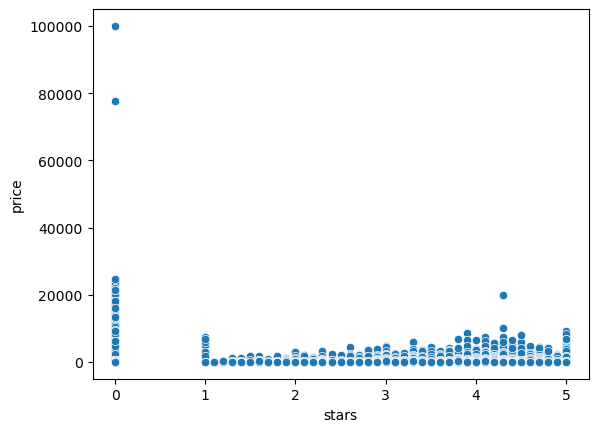

In [56]:
# 2. Visualizations:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, x='stars', y='price')

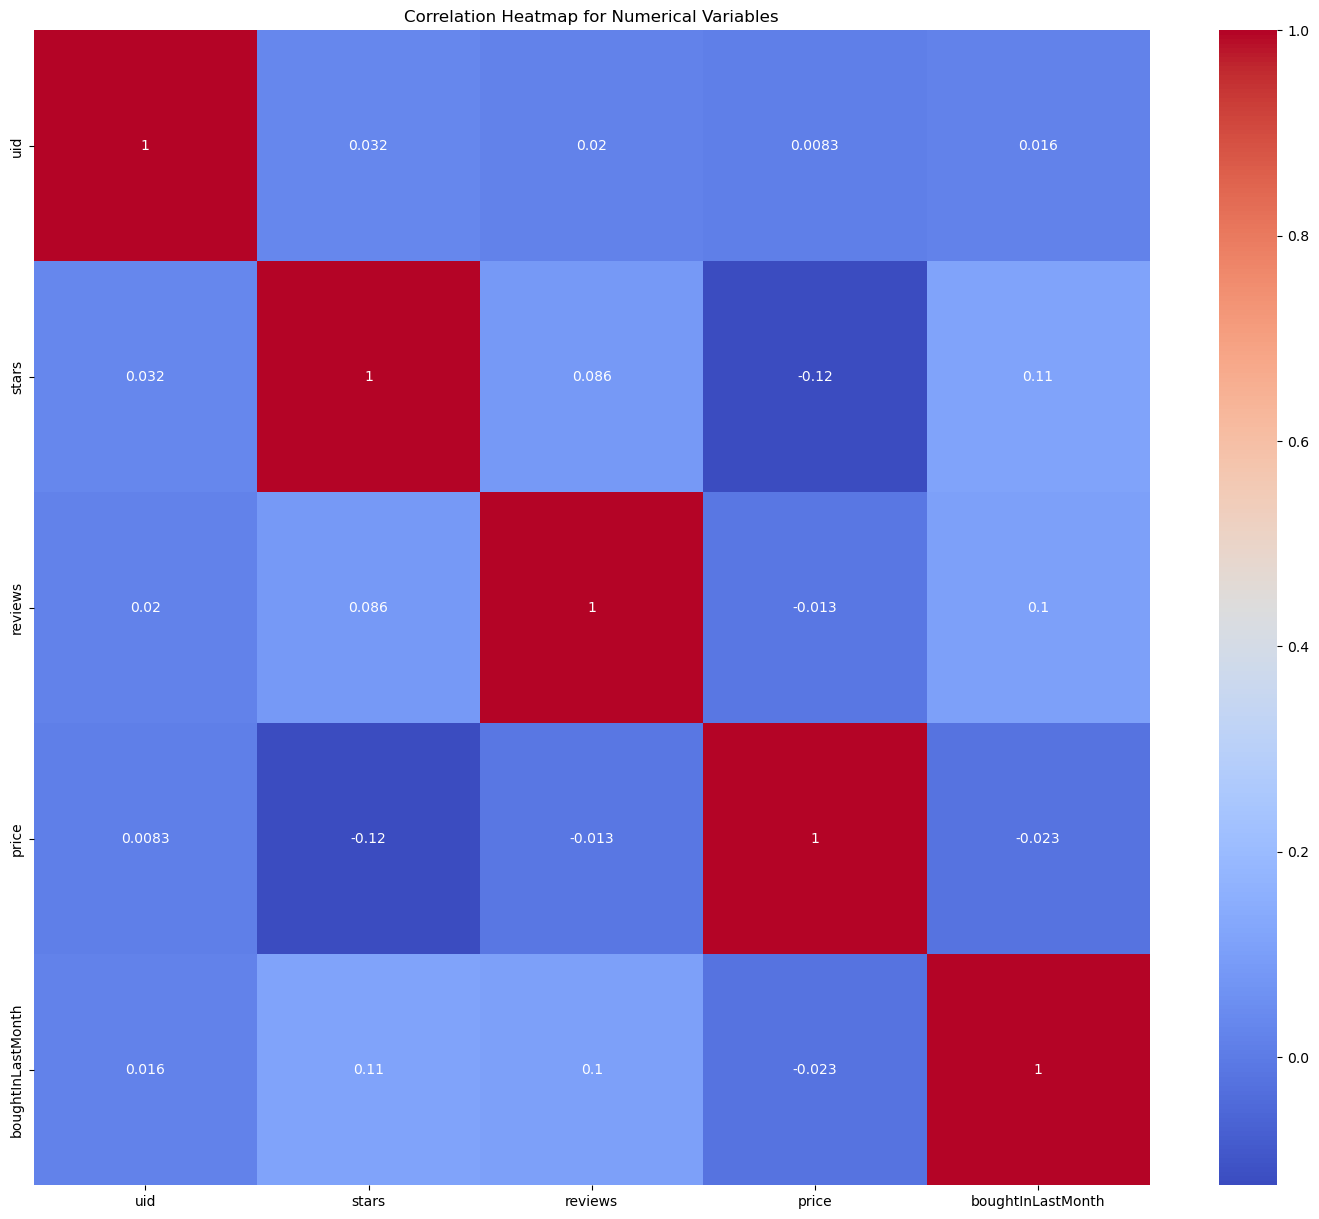

In [52]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
# Seleccionar solo las columnas numéricas del DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df_numerical.corr()

# Configurar la figura de matplotlib con un tamaño adecuado
plt.figure(figsize=(18, 15))

# Dibujar el heatmap para las columnas numéricas
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

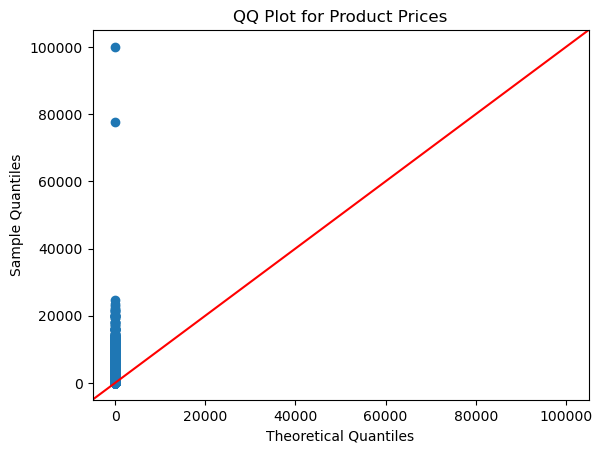

In [55]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
# Crear el gráfico QQ plot
sm.qqplot(df['price'], line ='45')


plt.title("QQ Plot for Product Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()